In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import lfw_dataset as lfw
from lfw_dataset import LFWDataLoader
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()


Data already exist


	First row - same person. second row - different persons



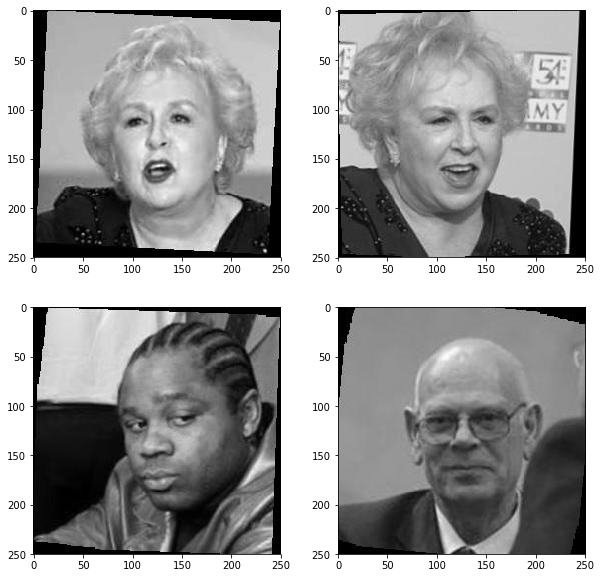

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread

# lets check that same images are really same person and vise versa
random_index = np.random.randint(0, len(same_train_paths))

f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(imread(same_train_paths[random_index][0]),cmap='gray')
ax[0][1].imshow(imread(same_train_paths[random_index][1]),cmap='gray')
ax[1][0].imshow(imread(diff_train_paths[random_index][0]),cmap='gray')
ax[1][1].imshow(imread(diff_train_paths[random_index][1]),cmap='gray')
print('\tFirst row - same person. second row - different persons\n')

In [51]:
from siamese import Siamese
learning_rate = 10e-2
s_net = Siamese(lr=learning_rate)
s_net.build()


In [52]:
train_history = s_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, batch_size=32)

Epoch 1/40
55/55 [==============================] - 14s 251ms/step - loss: 1.0335 - acc: 0.4898 - val_loss: 0.9845 - val_acc: 0.5072
Epoch 2/40
55/55 [==============================] - 11s 205ms/step - loss: 0.9436 - acc: 0.3699 - val_loss: 0.9548 - val_acc: 0.4688
Epoch 3/40
55/55 [==============================] - 10s 185ms/step - loss: 0.9106 - acc: 0.3170 - val_loss: 0.9423 - val_acc: 0.4495
Epoch 4/40
55/55 [==============================] - 10s 184ms/step - loss: 0.8922 - acc: 0.2847 - val_loss: 0.9366 - val_acc: 0.4471
Epoch 5/40
55/55 [==============================] - 11s 204ms/step - loss: 0.8786 - acc: 0.2648 - val_loss: 0.9340 - val_acc: 0.4399
Epoch 6/40
55/55 [==============================] - 10s 183ms/step - loss: 0.8687 - acc: 0.2534 - val_loss: 0.9299 - val_acc: 0.4423
Epoch 7/40
55/55 [==============================] - 10s 182ms/step - loss: 0.8604 - acc: 0.2437 - val_loss: 0.9264 - val_acc: 0.4447
Epoch 8/40
55/55 [==============================] - 10s 185ms/step - 

In [ ]:
def evaluate(test_loss, test_accuracy, train_history):

    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    print(history)
    # plot accuracy 
    axes[0].plot(train_history.history['acc'])
    axes[0].plot(train_history.history['val_acc'])
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='best')

    # plot loss
    axes[1].plot(train_history.history['loss'])
    axes[1].plot(train_history.history['val_loss'])
    axes[1].set_title('model loss')
    axes[1].set_ylabel('accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['training', 'validation'], loc='best')


    print()
    print(f'Test loss: {test_loss:.3}')
    print(f'Test accuracy: {test_accuracy:.3}')


In [ ]:
evaluate(test_loss, test_accuracy, train_history)